### 아침에 정자, 판교역에 내릴 사람 예측하기 - 데이터 탐색 

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

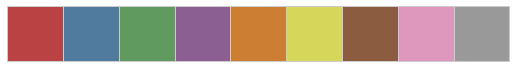

In [3]:
sns.set(style="whitegrid", rc={'font.family':'AppleGothic', 'figure.figsize': (12, 5)}, font_scale=1.4)
pal = sns.color_palette("Set1", n_colors=9, desat=.6)
sns.palplot(pal)
sns.set_palette(pal)

In [4]:
passenger_ds = pd.read_csv('./resource/passenser.csv')

### 1 Statistical Overview

In [5]:
print("%d일 %d명 신분당선 지하철 승객 데이터 " % ( len(passenger_ds.day.unique())
               , passenger_ds.shape[0]
                ) )

46일 322명 신분당선 지하철 승객 데이터 


In [7]:
passenger_ds.groupby('내리는역').count()[['count']] / passenger_ds.shape[0]

,count
내리는역,
강남역,0.779503
판교/정자역,0.220497


In [8]:
passenger_ds.groupby('내리는역').count()[['count']] 

,count
내리는역,
강남역,251
판교/정자역,71


In [7]:
passenger_ds.head(1)

,day,hour,seat_loc,성별,나이,행동,복장,이어폰여부,내리는역,좌석위치,연령대,count
0,2017-08-28,08:10,0,여자,40,핸드폰보기,평상복,이어폰:X,강남역,좌측:사이드,중년,1


In [8]:
passenger_ds.describe()

,seat_loc,나이,count
count,322.000000,322.000000,322.0
mean,3.000000,34.440994,1.0
std,2.003113,9.626899,0.0
min,0.000000,10.000000,1.0
25%,1.000000,30.000000,1.0
50%,3.000000,30.000000,1.0
75%,5.000000,40.000000,1.0
max,6.000000,60.000000,1.0


### 동천역 ~ 강남역 신분당선 앉은 사람 승객 분포
* matplotlib reference : https://www.slideshare.net/dahlmoon/matplotlib-20160730

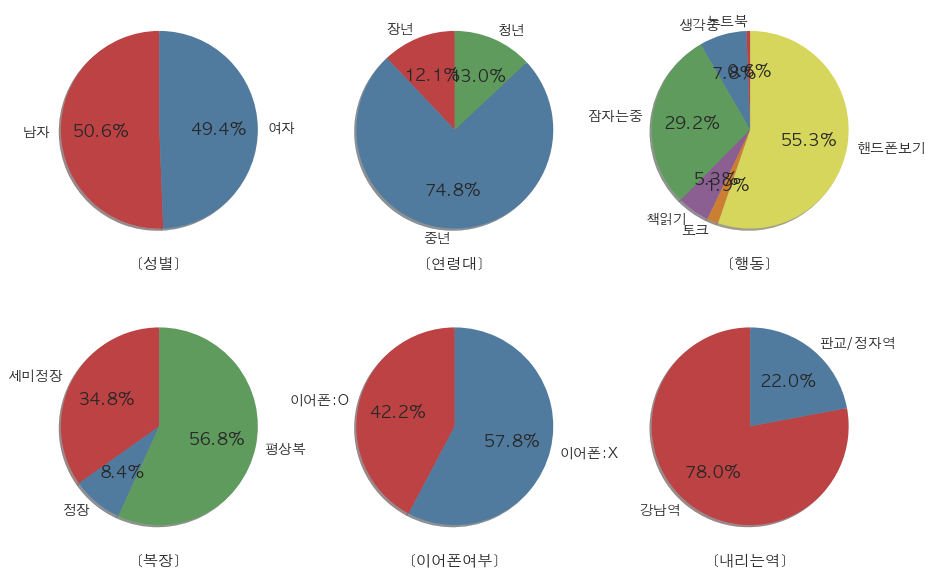

In [9]:
(plot_rows, plot_cols) = (2, 3)
size = 5

f, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols*size,plot_rows*size))
axes = np.concatenate( axes)

for (ax, col) in zip(axes,['성별', '연령대', '행동', '복장', '이어폰여부', '내리는역']):
    grouped_ds = passenger_ds.groupby(col).count()[['count']]
    grouped_ds.plot(kind='pie', y='count', subplots=False, autopct='%1.1f%%', ax=ax, legend=False
                    , shadow=True, startangle=90,)
    ax.set_xlabel("["+col+"]")
    ax.set_ylabel('')

### 가장 흔하게 볼수 있는 승객의 유형은?

In [16]:
def drawCommonPassenger(ds, topn=10, color=None):
    ds.groupby(['복장', '행동', '나이','성별'], as_index=True)\
                .agg({'count':len})\
                .sort_values('count', ascending=False)[:topn]\
                .sort_values('count', ascending=True)\
                .plot(kind='barh', color=color, figsize=(6,int(topn/1.5)), title='가장 흔한 승객 유형 Top %d 보는 유형'  % topn )
    plt.ylabel("")

* 전체 대상

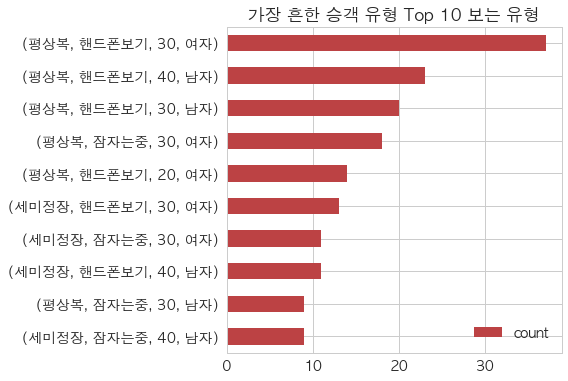

In [17]:
drawCommonPassenger(passenger_ds, topn=10)

* 강남역 하자 승객

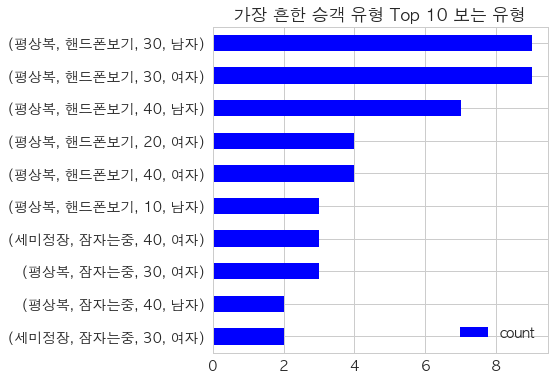

In [18]:
drawCommonPassenger(passenger_ds[passenger_ds["내리는역"]=='판교/정자역'], color='b')

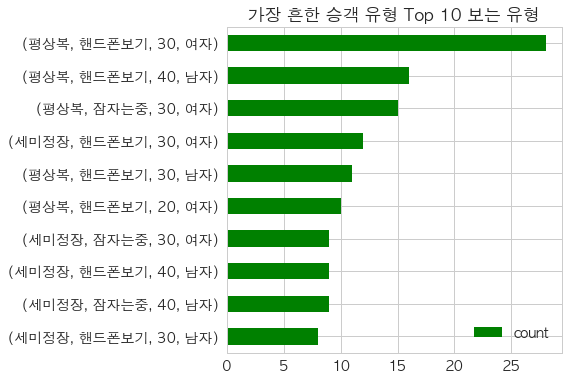

In [19]:
drawCommonPassenger(passenger_ds[passenger_ds["내리는역"]=='강남역'], color='g')

In [30]:
print("하루에 판교/정자역 내리는 사람수는? 7명 중 %.3f명"%
    passenger_ds[passenger_ds['내리는역'].isin(['판교/정자역'])].groupby('day').count()[['count']].mean().iloc[0]
     )

하루에 판교/정자역 내리는 사람수는? 7명 중 1.775명


### 지하철 승객 유형 분석 

* 성별 특징 

In [31]:
def drawCompareFeature(ds, feature1, feature2, title="", color=None):
    grouped_ds = ds.groupby([feature1, feature2], as_index=False)[['count']]\
            .count()\
            .pivot_table(index=feature2, columns=feature1, values='count', fill_value=0)\
    
    fig1, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(15,5))
    grouped_ds.plot(kind='bar', stacked=True,alpha=1, ax=ax1, color=color)
    ((grouped_ds.T/grouped_ds.sum(axis=1)).T).plot(kind='bar', stacked=True,alpha=1, ax=ax2, color=color)
    plt.tight_layout(pad=1.1)
    #return grouped_ds
    

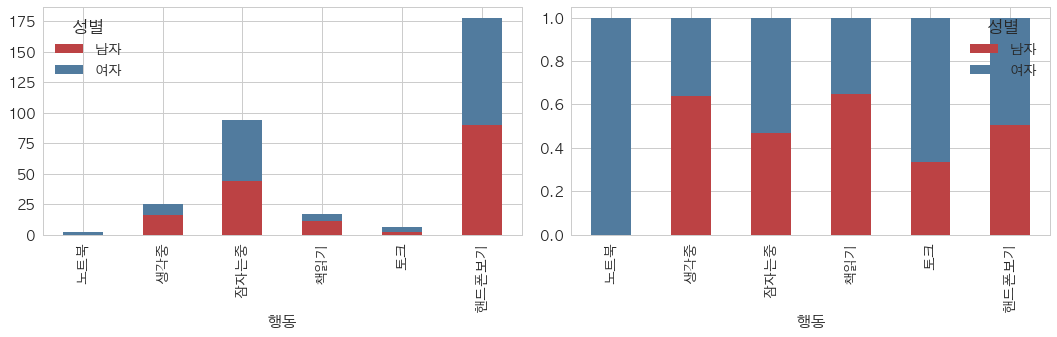

In [35]:
drawCompareFeature(passenger_ds, '성별', '행동', "성별에 따른 행동비교")        

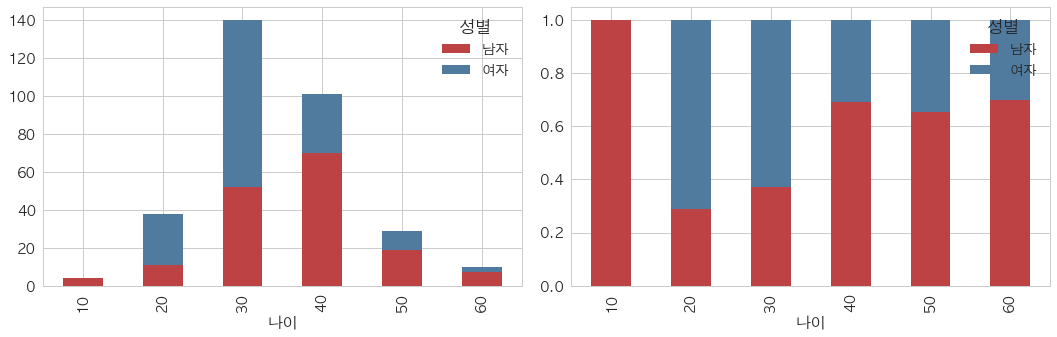

In [36]:
drawCompareFeature(passenger_ds, '성별', '나이', "성별에 따른 행동비교")        

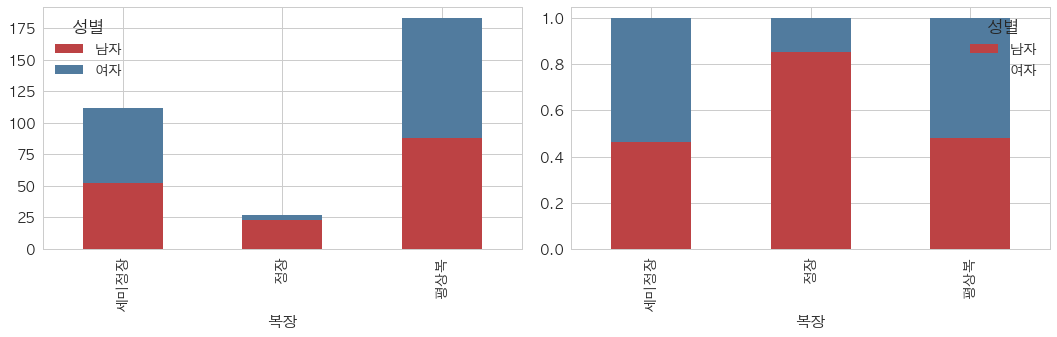

In [37]:
drawCompareFeature(passenger_ds, '성별', '복장', "성별에 따른 행동비교")        

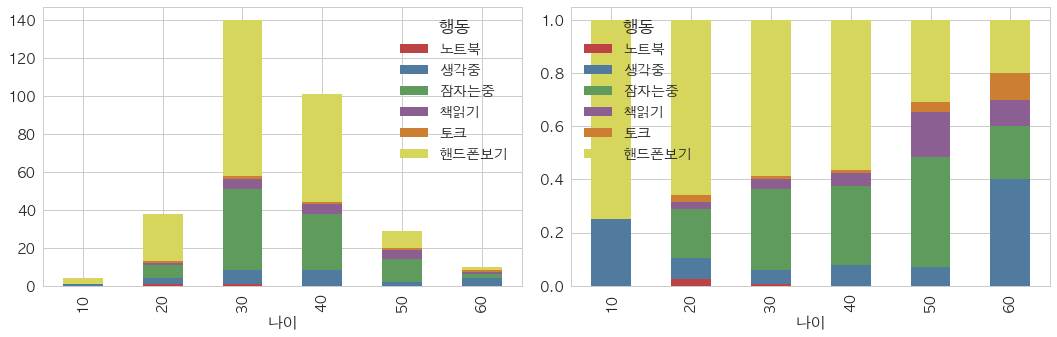

In [38]:
drawCompareFeature(passenger_ds, '행동', '나이', "성별에 따른 행동비교")

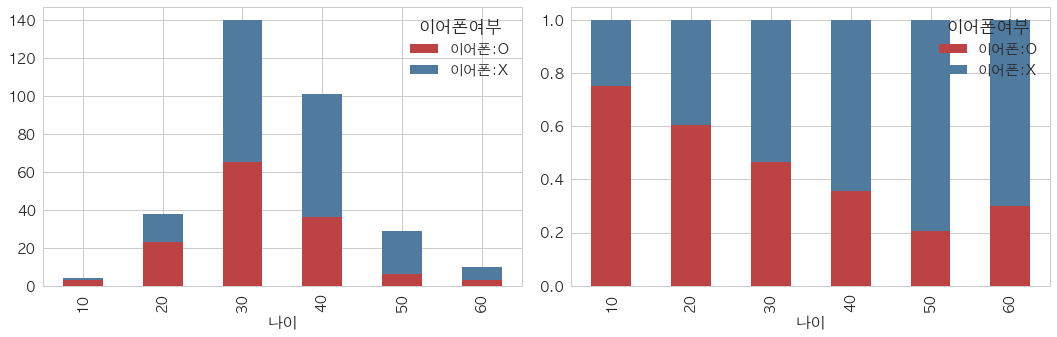

In [39]:
drawCompareFeature(passenger_ds, '이어폰여부', '나이')

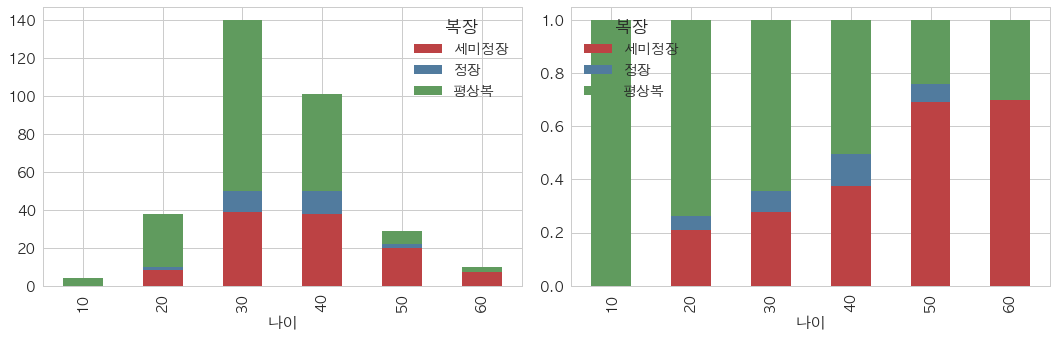

In [40]:
drawCompareFeature(passenger_ds, '복장', '나이')

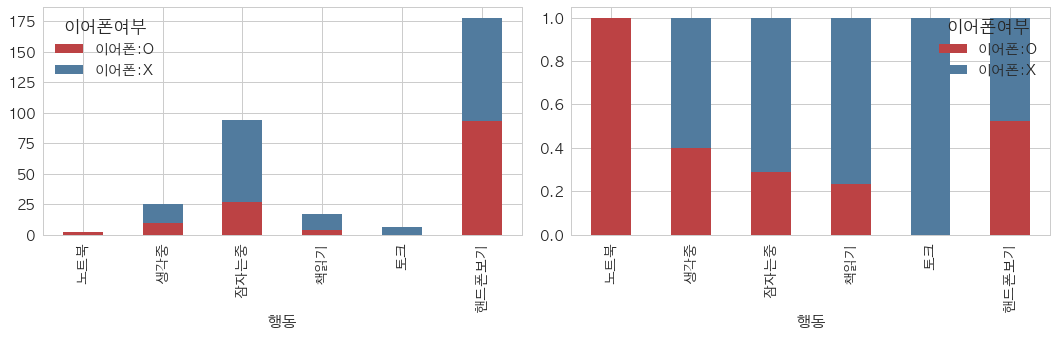

In [41]:
drawCompareFeature(passenger_ds, '이어폰여부', '행동')

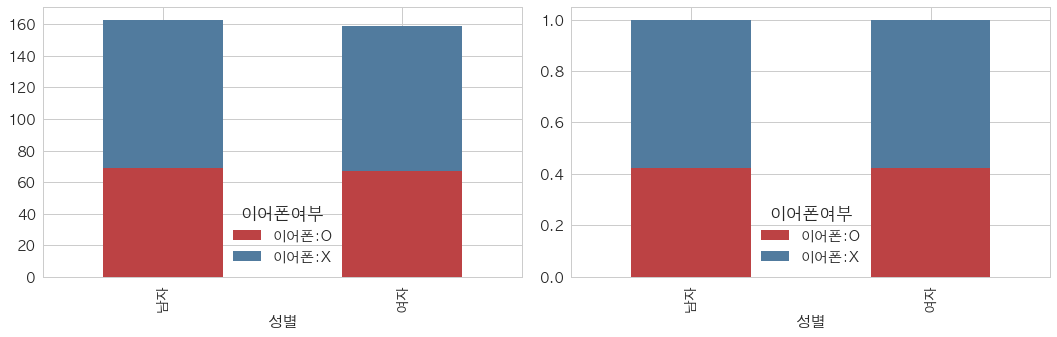

In [42]:
drawCompareFeature(passenger_ds, '이어폰여부', '성별')

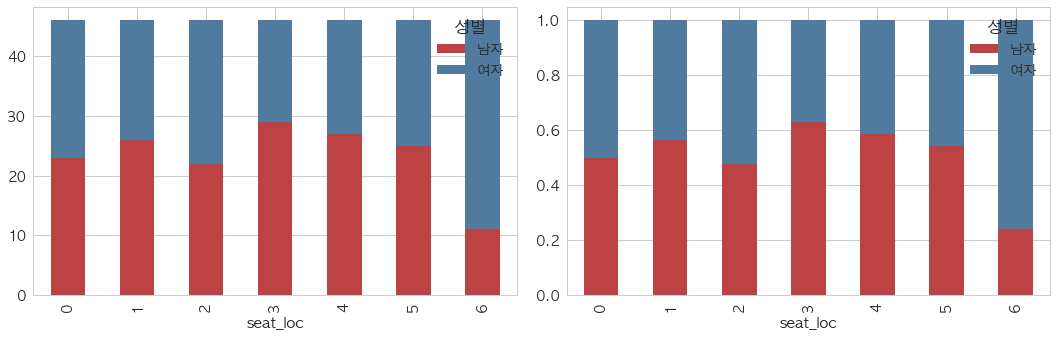

In [43]:
drawCompareFeature(passenger_ds, '성별', 'seat_loc')

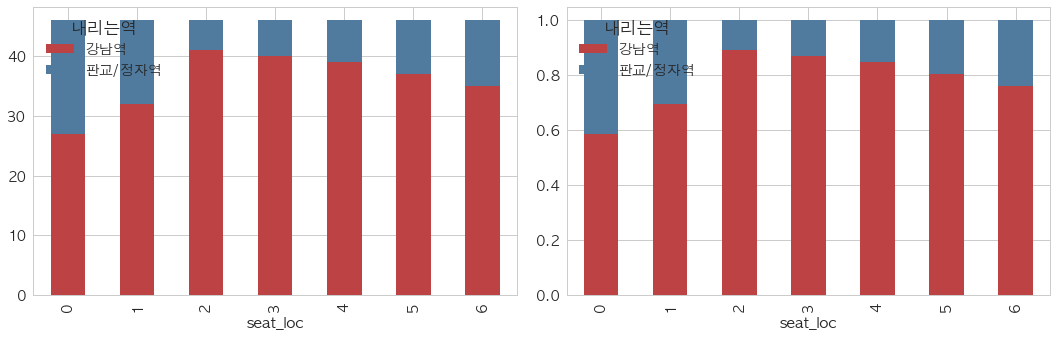

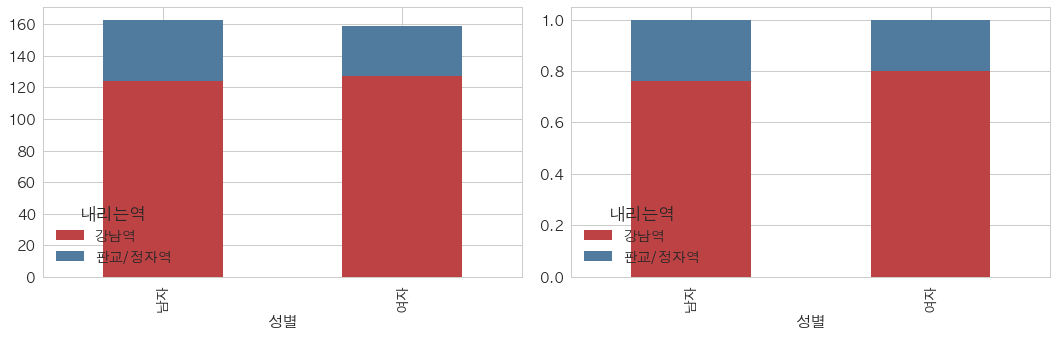

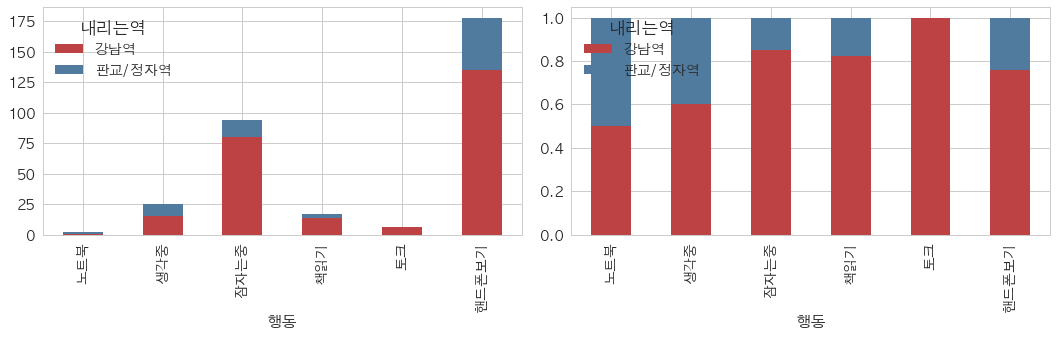

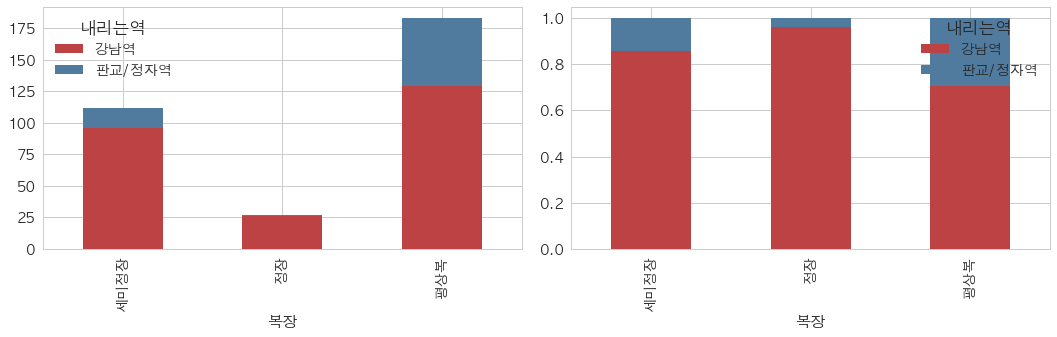

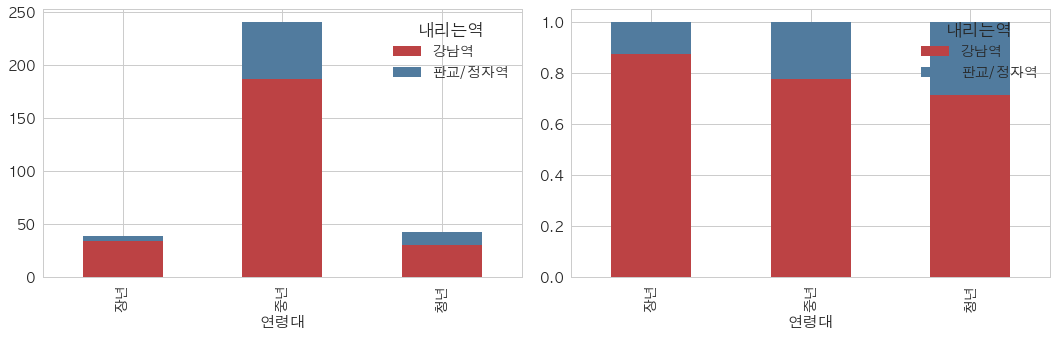

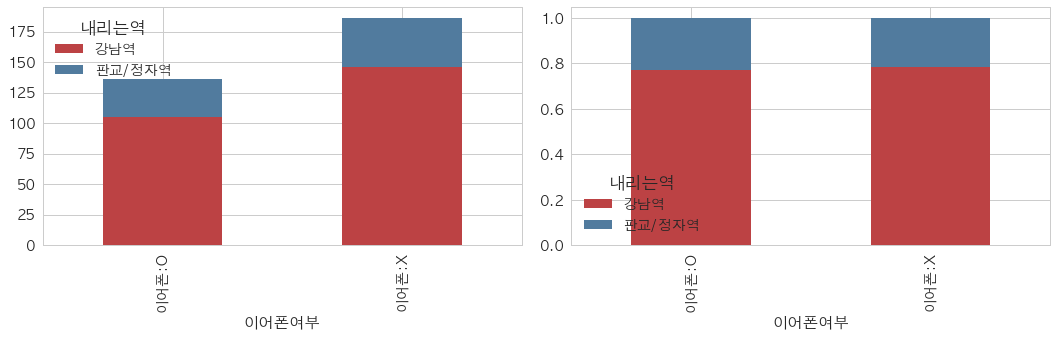

In [44]:
drawCompareFeature(passenger_ds, '내리는역', 'seat_loc')
drawCompareFeature(passenger_ds, '내리는역', '성별')
drawCompareFeature(passenger_ds, '내리는역', '행동')
drawCompareFeature(passenger_ds, '내리는역', '복장')
drawCompareFeature(passenger_ds, '내리는역', '연령대')
drawCompareFeature(passenger_ds, '내리는역', '이어폰여부')


### "팡요/정자" vs "강남" 내리는 사람 특징 비교

In [45]:
def drawPie(ds, ax=None, y='count', label='' ):
    ds.plot(kind='pie', y=y, subplots=False, autopct='%1.1f%%', ax=ax, legend=False, shadow=True, startangle=90)
    if ax :
        ax.set_xlabel(label)
        ax.set_ylabel('')

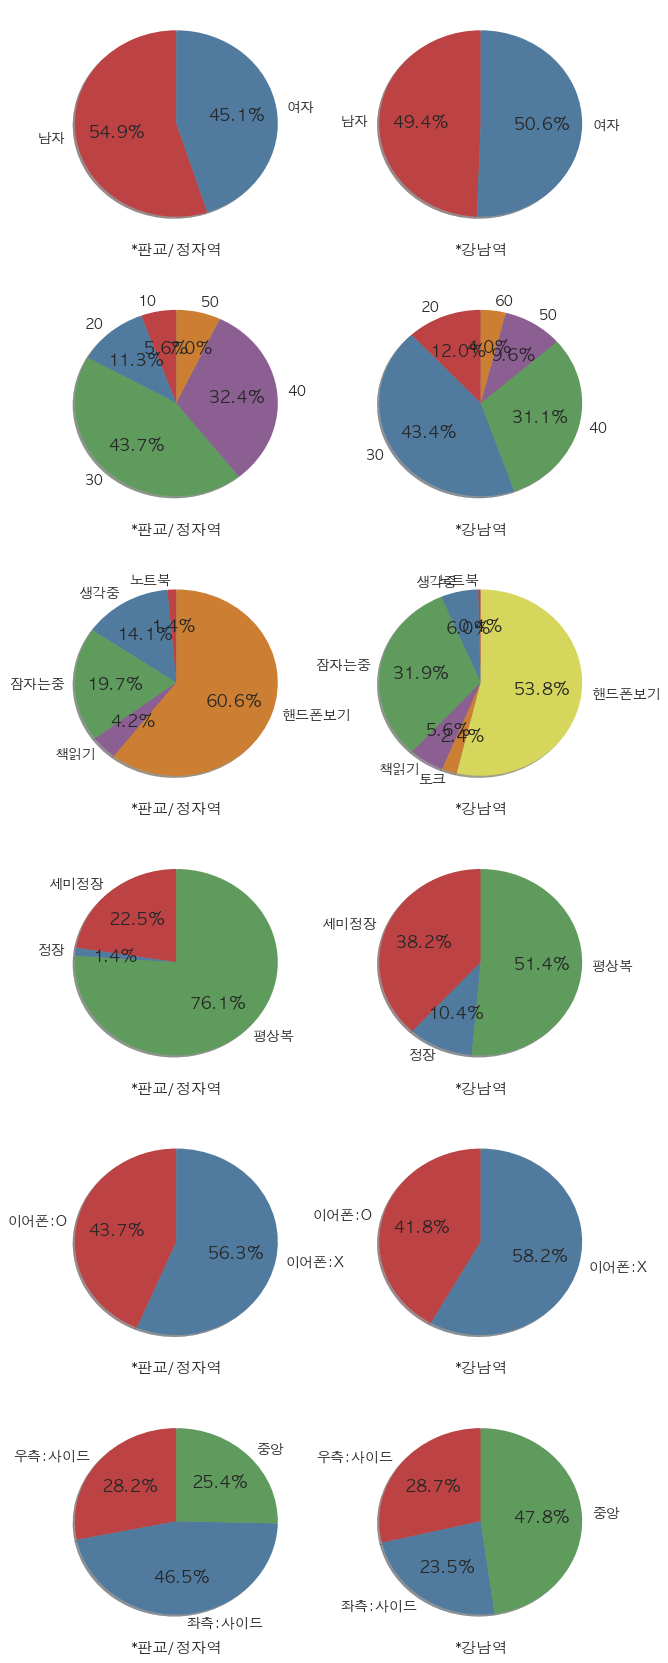

In [46]:
target_columns = ['성별', '나이', '행동', '복장', '이어폰여부','좌석위치']

(plot_rows, plot_cols) = (len(target_columns), 2)
size = 5

pj_passenger_ds = passenger_ds[passenger_ds['내리는역'].isin(['판교/정자역'])]
kn_passenger_ds = passenger_ds[passenger_ds['내리는역'].isin(['강남역'])]

f, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols*size,plot_rows*size))
for (index, col) in enumerate(target_columns):
    drawPie(pj_passenger_ds.groupby(col).count()[['count']], ax=axes[index][0], label='*판교/정자역')
    drawPie(kn_passenger_ds.groupby(col).count()[['count']], ax=axes[index][1], label='*강남역')


### 어떤 특이점이 있을까?
* 대부분이 특징이 유사하지만 복장과 좌석위치에 따라 특징점이 있다. 
* 복장 면에서 많은 차이가 있다. 
 * 정장입고 판교/정자에서 내리는 사람은 없다. 
 * 평상복이 압도적으로 많다. 
* 좌석중에 0번 가장 좌측의 사람이 내리는 비율이 높다. 
 * 사람들이 가장 선호하는 자리가 가장 끝자리이니, 가장 먼곳에서 탄 사람일 것이다. 
 * 그래서 강남보다 가까운 거리에서 내리는 사람이 많을듯 한다. 


* 출간시간은 분포는 어떤가?

In [47]:
passenger_ds['hour_int'] = passenger_ds.hour.apply(lambda x: int(x[:2])+(int(x[-2:]))/60)
#sns.distplot(passenger_ds.hour_int)

---
###  Dataset encoding 
* label encoding ( integer encoding )
* one hot encoding ( binary encoding )

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

passenger_ds.rename(columns={'하차여부':'내리는역'}, inplace=True)

In [49]:
passenger_ds['내리는역 성별 연령대 행동 이어폰여부 좌석위치'.split()].head(3)

,내리는역,성별,연령대,행동,이어폰여부,좌석위치
0,강남역,남자,중년,핸드폰보기,이어폰:O,좌측:사이드
1,강남역,남자,중년,핸드폰보기,이어폰:O,좌측:사이드
2,강남역,여자,중년,책읽기,이어폰:O,중앙


In [50]:
# label encoding 
le_enc_dict = defaultdict(LabelEncoder)
le_passenger_ds = passenger_ds.apply(lambda x:le_enc_dict[x.name].fit_transform(x))
le_passenger_ds = le_passenger_ds['내리는역 성별 연령대 행동 이어폰여부 좌석위치'.split()]
le_passenger_ds.to_csv("./resource/passenser_label_encoding.csv", index=None)

In [51]:
le_passenger_ds.head()

,내리는역,성별,연령대,행동,이어폰여부,좌석위치
0,0,0,1,5,0,1
1,0,0,1,5,0,1
2,0,1,1,3,0,2
3,0,0,1,1,0,2
4,0,1,1,5,0,2


In [52]:
ohe_enc = OneHotEncoder()
ohe_passenger_array = ohe_enc.fit_transform(le_passenger_ds).toarray()
ohe_header = []
for col in le_passenger_ds.columns:
    ohe_header.extend(le_enc_dict[col].classes_ )

ohe_passenger_ds = pd.DataFrame(ohe_passenger_array, columns=ohe_header)
ohe_passenger_ds = ohe_passenger_ds.applymap(int)
ohe_passenger_ds.to_csv("./resource/passenser_one_hot_encoding.csv", index=None)

In [53]:
ohe_passenger_ds[['판교/정자역']].T

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
판교/정자역,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
ohe_passenger_ds[['판교/정자역']].T

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
판교/정자역,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


---
### Correlation Matrix & Heatmap
* ** Correlated Features ** : 판교/정자역 하차
 * Positive Feature : 좌측:사이드(0.211), 생각중(0.126)
 * Negative Feature : 잠자는중(-0.111), 중앙(-0.188)
* ** Other Positive Correlated Faatures ** : 
 * 남자-중앙좌석(0.102), 
 * 책읽기-장년층(0.168), 
 * 잠자는중-이어폰:X(0.176), 
 * 핸드폰-이어폰:O(0.225)
* ** Other Negative Correlated Faatures ** : 
 * 남자-우측:사이드(-0.145)
 * 핸드폰보기-장년(-0.202)


 


,강남역,판교/정자역,남자,여자,장년,중년,청년,노트북,생각중,잠자는중,책읽기,토크,핸드폰보기,이어폰:O,이어폰:X,우측:사이드,좌측:사이드,중앙
강남역,1.000,-1.000,-0.046,0.046,0.083,-0.015,-0.061,-0.053,-0.126,0.111,0.025,0.073,-0.057,-0.015,0.015,0.005,-0.211,0.188
판교/정자역,-1.000,1.000,0.046,-0.046,-0.083,0.015,0.061,0.053,0.126,-0.111,-0.025,-0.073,0.057,0.015,-0.015,-0.005,0.211,-0.188
남자,-0.046,0.046,1.000,-1.000,0.119,0.000,-0.115,-0.080,0.078,-0.049,0.067,-0.048,-0.001,0.002,-0.002,-0.145,0.033,0.102
여자,0.046,-0.046,-1.000,1.000,-0.119,-0.000,0.115,0.080,-0.078,0.049,-0.067,0.048,0.001,-0.002,0.002,0.145,-0.033,-0.102
장년,0.083,-0.083,0.119,-0.119,1.000,-0.640,-0.144,-0.029,0.106,0.055,0.168,0.090,-0.202,-0.144,0.144,0.060,-0.108,0.044
중년,-0.015,0.015,0.000,-0.000,-0.640,1.000,-0.668,-0.045,-0.099,0.042,-0.087,-0.079,0.083,-0.011,0.011,-0.061,0.097,-0.033
청년,-0.061,0.061,-0.115,0.115,-0.144,-0.668,1.000,0.087,0.025,-0.107,-0.050,0.015,0.089,0.154,-0.154,0.020,-0.020,-0.000
노트북,-0.053,0.053,-0.080,0.080,-0.029,-0.045,0.087,1.000,-0.023,-0.051,-0.019,-0.011,-0.088,0.092,-0.092,0.037,-0.050,0.011
생각중,-0.126,0.126,0.078,-0.078,0.106,-0.099,0.025,-0.023,1.000,-0.186,-0.068,-0.040,-0.323,-0.013,0.013,0.073,-0.055,-0.017
잠자는중,0.111,-0.111,-0.049,0.049,0.055,0.042,-0.107,-0.051,-0.186,1.000,-0.152,-0.088,-0.714,-0.176,0.176,0.002,-0.043,0.037


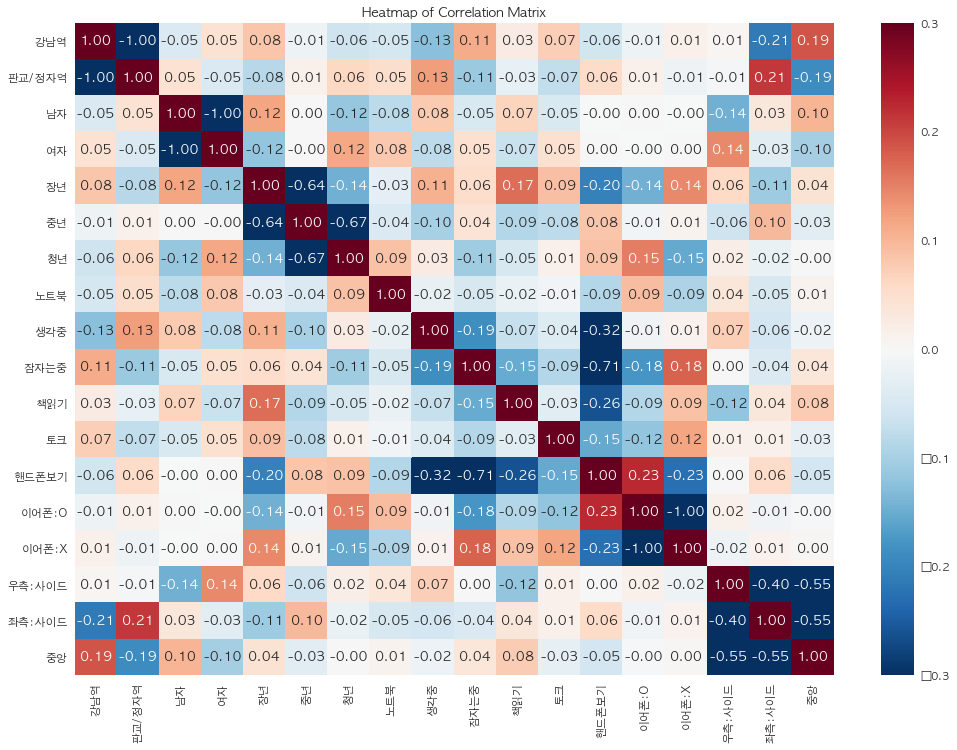

In [59]:
#Correlation Matrix
corr = ohe_passenger_ds.corr()
corr = corr.applymap(lambda x: round(x,3))

sns.set(style="whitegrid", rc={'font.family':'AppleGothic'}, font_scale=1.1)
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', vmax=.3, vmin=-.3)
plt.title('Heatmap of Correlation Matrix')

corr

## clustering by correllation 

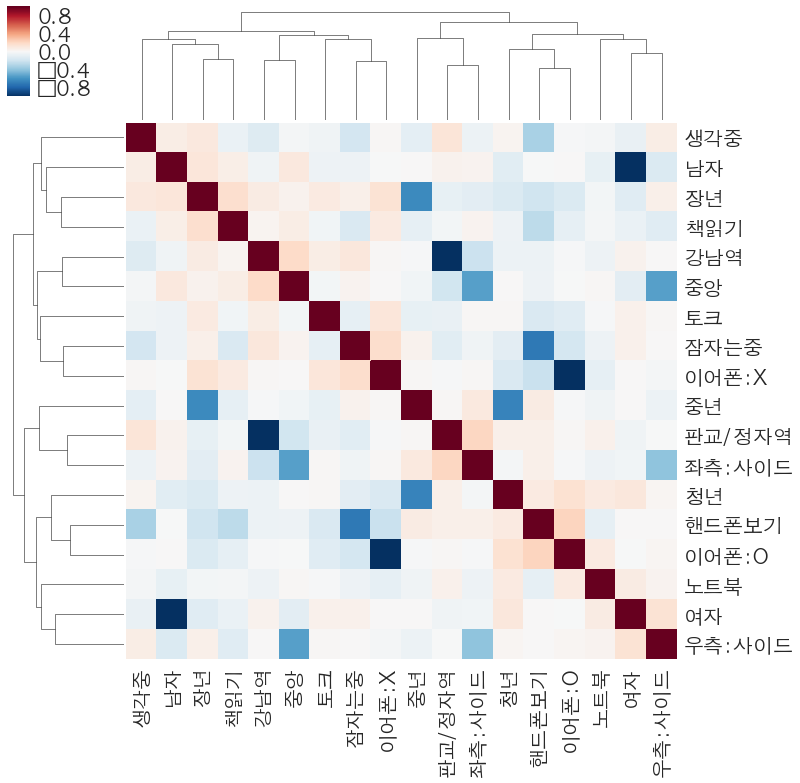

In [64]:
sns.set(style="whitegrid", rc={'font.family':'AppleGothic', 'figure.figsize': (12, 5)}, font_scale=2)
sns.clustermap(corr, cmap='RdBu_r', figsize=(12,12),metric='cosine')

---


In [65]:
passenger_ds.groupby('성별 나이 행동 복장 이어폰여부 좌석위치'.split(), as_index=False)\
        .agg({'내리는역':lambda x:len(x.unique())})\
        .groupby('내리는역')\
        .count()


,성별,나이,행동,복장,이어폰여부,좌석위치
내리는역,,,,,,
1,141,141,141,141,141,141
2,31,31,31,31,31,31
